In [12]:
import numpy as np
from scipy.stats import norm
import sys
sys.path.insert(1, '/home/amrzr/Work/Codes/offline_data_driven_moea/')
from desdeo_emo.othertools.ProbabilityWrong import Probability_wrong

n_samples = 5000

#z=np.array([1,2,3])
#w=np.array([1,2,3])
#mu_f=np.array([4,5,6])
#sigma_f=np.array([0.2,0.3,0.4])

z=np.random.rand(3)*3
w=np.random.rand(3)*4
mu_f=np.random.rand(3)*5
sigma_f=np.random.rand(3)
m=w*(mu_f-z)
s=w*sigma_f
"""
g=np.max(w*(mu_f-z))
m=w*(mu_f-z)
s=w*sigma_f
g_m_s = (g-m)/s
pdf_i = norm.pdf(g_m_s)
cdf_i = norm.cdf(g_m_s)
print(g)
print(m)
print(s)
print(pdf_i)
print(cdf_i)
"""
def get_pdf_g(g, m, s):
    g_m_s = (g-m)/s
    pdf_i = norm.pdf(g_m_s)
    cdf_i = norm.cdf(g_m_s)
    prod_cdf_g = np.prod(cdf_i)
    sigma_term = np.sum((pdf_i/cdf_i)/s)
    pdf_g = sigma_term * prod_cdf_g
    return pdf_g

g1=np.linspace(-1, 15.0, num=n_samples)
pdf_g1 = np.zeros(n_samples)
for i in range(n_samples):
    pdf_g1[i] = get_pdf_g(g1[i],m,s)

pwrong_current = Probability_wrong(mean_values=mu_f.reshape(1,-1), stddev_values=sigma_f.reshape(1,-1), n_samples=n_samples)
pwrong_current.vect_sample_f()
g_samples = np.max(np.tile(w.reshape(1,-1,1),(1,1,n_samples))*(pwrong_current.f_samples-np.tile(z.reshape(1,-1,1),(1,1,n_samples))), axis=1).flatten()


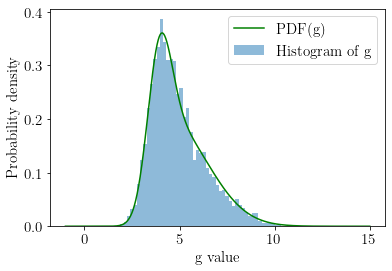

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'g value')
ax.set_ylabel(r'Probability density')
count, bins, ignored = ax.hist(g_samples, 50, density=True, alpha=0.5, label=r'Histogram of g')
ax.plot(g1,pdf_g1,color='g',label=r'PDF(g)')
ax.legend()
#fig.tight_layout()
plt.show()
